In [1]:
import importlib
import library.nbtool as nbtool; importlib.reload(nbtool)
import parser.lycee as lycee;    importlib.reload(lycee)
from parser.lycee import *

sorted collection imported


# Read the dataset and construct the multi stream graph

In [2]:
Lycee = MultiStream(interval, LYCEE, LayerList([]), LinkList([]))
liste, liste2 = readNodes(Lycee, ["face_to_face", "facebook", "friendship"])
ti, ni = readLinks(Lycee, liste)
readLinks2(Lycee, liste, liste2)   # read facebook links
readLinks3(Lycee, liste, liste2)   # read friendship links

readlink2...
readlink3...
link3 done


## Various types of layer definitions

In [3]:
_math_physics = layerWithCommonPoint(LYCEE, "annee", "MP")
MathPhysics = Lycee.extractLayers(_math_physics)

_girls, _boys = [layerWithCommonPoint(LYCEE, 'sexe', sexe) for sexe in ['F', 'M']]
Girls   = Lycee.extractLayers(_girls)
Boys    = Lycee.extractLayers(_boys)
UniSex  = Lycee.interLayers(_girls, _boys)

_f2f = layerWithCommonPoint(LYCEE, "typeOfRel", "face_to_face")  # face to face layer
F2F     = Lycee.extractLayers(_f2f)

## Cut the Multi-layer stream graph (MLSG) in a window of time

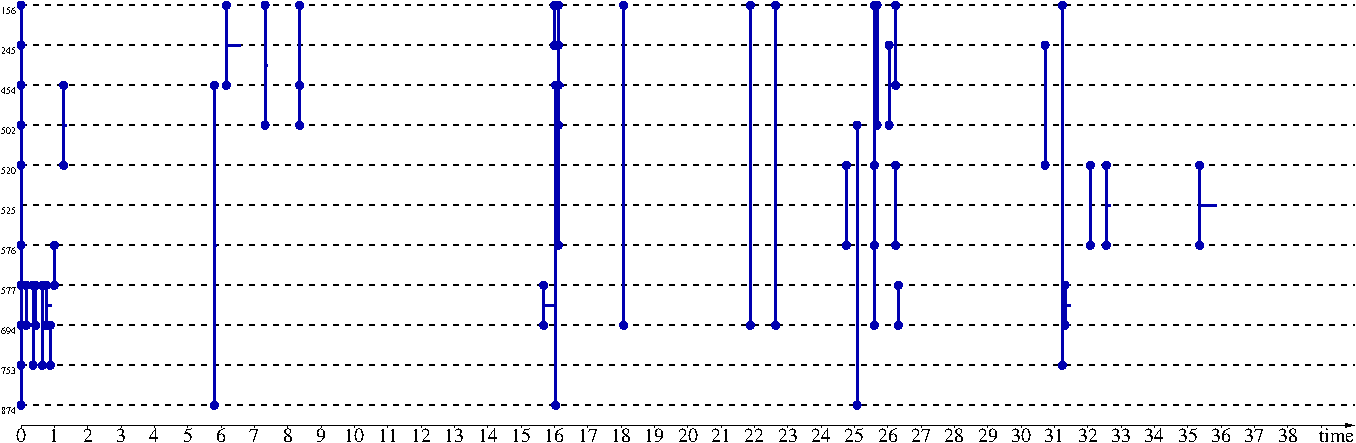

/Users/wakita/Dropbox/projects/mxvis/mx-streams/src/outputs/mp_girls.png

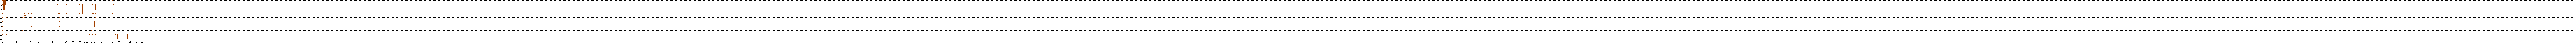

/Users/wakita/Dropbox/projects/mxvis/mx-streams/src/outputs/mp_girls_ordonne.png

In [4]:
# Face to face relationship among girls taking Math & Physics during the period [0, 40]
mp_girls = Lycee.cut(Interval(0, 40)).extractLayers(_math_physics).extractLayers(_girls).extractLayers(_f2f)

nbtool.drawMS(mp_girls, name='mp_girls', show=True)
nbtool.drawMS(mp_girls, name='mp_girls_ordonne', show=True, ordonne=True)

## Bug

`mp_firls_ordonne.fig` is a bit broken.  Somehow when `ordonne=True` is specified the drawMS seem to resets the interval.  This is not the case with Pimprenelle's original implementation.  I think this is due to inappropriate implicit reference of a global variable in my implementation.

# Playground

## `elemMSGraph`

- Layers: layerStruct, layers, numberOfNodeLayers
- Nodes: nodes, numberOfNodes
- Links: giveLinks
- Paths: enumShortestPath, foremostPath
- Structural operations
    - interval
    - giveLayers, giveListForForemost, giveListForLastDept
    - cut, extractLayers, extractML
    - directed
    - interLayers
- Computate indices
    - calculMatriceProbaTransition
    - calculProba
    - computeCovMatrix, computeLengthEm, comupteIntricationMatrixBurtMS
    - computeDensity, computeDensityBiparti, elemLayerDensitiesMat, elemLayerDensitiesMatDiag0
- Unknown
    - avionsSuivants, em, findWindows, lastDeptPath, multit, ordreAretes

## `elemMSGraph.LinkList`

`mp_girls.giveLinks() : visuMultiStream.MultiStream = `

- addLink
- countLinks: `#giveListofLinks()`?
- giveIndex: gives the index number for a node
- giveListFor{Enum, Foremost, LastDept}
- giveListofLinks
- length
- listOfLinks

In [5]:
edges = mp_girls.giveLinks()
link = edges.listOfLinks[0]
#print(dir(link)); print()
#link.printLink(); print()

intervals = link.giveIntervals()  # link.intervals (interval collection object), link.giveIntervals2 (???)
print(f'{link.node1.node} -> {link.node2.node}: #{len(intervals)}, {link.giveLength()}')

n1 = link.node1
# n1.node: str

156 -> 245: #2, 0.03999999999999915


In [6]:
connected_pairs = set()  # a set of pairs of nodes that form at least one link
n_connections = {}         # a mapping from a pair of nodes to the number of links in between them

for link in mp_girls.giveLinks().listOfLinks:
    l = n1, n2 = link.node1.node, link.node2.node
    connected_pairs |= set([l])
    connected_pairs |= set([l])
    if l not in n_connections: n_connections[l] = 0; n_connections[(n2, n1)] = 0
    n_intervals = len(link.giveIntervals())
    n_connections[l] += n_intervals; n_connections[(n2, n1)] += n_intervals

from IPython.display import display, Markdown

display(Markdown('### A set of connected nodes in Lycee[0,40]/MP/girls/f2f'))
print('', connected_pairs); print()
display(Markdown('### #Connectios in Lycee[0,40]/MP/girls/f2f'))
for k in n_connections: print(k, n_connections[k])

### A set of connected nodes in Lycee[0,40]/MP/girls/f2f

 {('694', '753'), ('156', '753'), ('454', '874'), ('156', '454'), ('577', '753'), ('454', '520'), ('577', '694'), ('156', '502'), ('454', '502'), ('156', '694'), ('245', '520'), ('454', '576'), ('156', '245'), ('502', '874'), ('520', '576'), ('245', '502'), ('576', '577')}



### #Connectios in Lycee[0,40]/MP/girls/f2f

('156', '245') 2
('245', '156') 2
('156', '454') 3
('454', '156') 3
('156', '502') 5
('502', '156') 5
('156', '694') 5
('694', '156') 5
('156', '753') 2
('753', '156') 2
('245', '502') 3
('502', '245') 3
('245', '520') 1
('520', '245') 1
('454', '502') 2
('502', '454') 2
('454', '520') 1
('520', '454') 1
('454', '576') 2
('576', '454') 2
('454', '874') 3
('874', '454') 3
('502', '874') 2
('874', '502') 2
('520', '576') 7
('576', '520') 7
('576', '577') 2
('577', '576') 2
('577', '694') 7
('694', '577') 7
('577', '753') 2
('753', '577') 2
('694', '753') 1
('753', '694') 1
